# Rental Prices Regression Project

## 1. Introduction

This notebook analyses the data of the 2024 rental prices across Canada and explores multiple regression models in order to find the one that predicts the price the most accurately.

**About the dataset**

For this project, we will work with the dataset named *25000+ Canadian rental housing market June 2024* that can be found [here](https://www.kaggle.com/datasets/sergiygavrylov/25000-canadian-rental-housing-market-june-2024).

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## 2. Exploratory Data Analysis (EDA)

In [8]:
# Load data
df = pd.read_csv('Data/canada_rent.csv')

### 2.1 Data Exploration

In [10]:
df.shape

(25771, 18)

In [11]:
pd.set_option('display.max_colwidth', None)
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True


In [12]:
df.sample(5)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
6171,388741,Edmonton,Alberta,10940 105 St NW,53.556077,-113.501378,Long Term,Apartment,1259.0,1 Bed,1,0,/ab/edmonton/rentals/apartment/1-bedroom/mcdougall/pet-friendly/388741,Unfurnished,Immediate,Non-Smoking,True,True
9168,505491,Kelowna,British Columbia,1370 Ridgeway Drive,49.891639,-119.458149,Long Term,Apartment,2095.0,2 Beds,2,1096,/bc/kelowna/rentals/apartment/2-bedrooms/non-smoking/505491,Unfurnished,Immediate,Non-Smoking,False,False
12767,410845,Calgary,Alberta,"113, 7885 Macleod Trail SW",50.983454,-114.072765,Long Term,Apartment,2454.0,2 Beds,2,968 sqft,/ab/calgary/rentals/apartment/1-bedroom/kingsland/pet-friendly/410845,Unfurnished,No Vacancy,Non-Smoking,True,True
13655,127443,Calgary,Alberta,1053 10 St SW,51.043551,-114.086696,Negotiable,Condo Unit,2350.0,2 Beds,1,650,/ab/calgary/rentals/condo/2-bedrooms/beltline/non-smoking/127443,Unfurnished,August 01,Non-Smoking,False,False
25636,327711,Saskatoon,Saskatchewan,1919 22nd Street W,52.129100,-106.700338,Long Term,Apartment,1150.0,2 Beds,1,NaN,/sk/saskatoon/rentals/apartment/1-bedroom/mount-royal/pet-friendly/327711,Unfurnished,Immediate,Non-Smoking,True,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [14]:
df.describe()

,rentfaster_id,latitude,longitude,price
count,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142
std,120330.335865,3.603257,17.917001,972.820941
min,820.000000,40.741802,-128.661880,0.000000
25%,415749.000000,45.418785,-114.074660,1600.000000
50%,522379.000000,50.913739,-113.513905,2045.000000
75%,563397.500000,51.093585,-79.401311,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


In [15]:
df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [16]:
df[df.duplicated()]

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
5,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,November 18,Non-Smoking,True,True
79,453882,Airdrie,Alberta,45 Gateway Drive,51.304497,-114.011563,Long Term,Apartment,1630.0,1 Bed,1,616,/ab/airdrie/rentals/apartment/1-bedroom/pet-friendly/453882,Unfurnished,Immediate,Non-Smoking,True,True
81,453882,Airdrie,Alberta,45 Gateway Drive,51.304497,-114.011563,Long Term,Apartment,1630.0,1 Bed,1,616,/ab/airdrie/rentals/apartment/1-bedroom/pet-friendly/453882,Unfurnished,July 01,Non-Smoking,True,True
82,453882,Airdrie,Alberta,45 Gateway Drive,51.304497,-114.011563,Long Term,Apartment,1630.0,1 Bed,1,616,/ab/airdrie/rentals/apartment/1-bedroom/pet-friendly/453882,Unfurnished,July 01,Non-Smoking,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25623,370064,Saskatoon,Saskatchewan,402 Avenue P S,52.124402,-106.693794,Long Term,Apartment,950.0,2 Beds,1,627,/sk/saskatoon/rentals/apartment/1-bedroom/pleasant-hill/pet-friendly/370064,Unfurnished,Immediate,Non-Smoking,True,True
25624,294127,Saskatoon,Saskatchewan,1901 22 Street W,52.129052,-106.699600,Long Term,Apartment,850.0,1 Bed,1,400,/sk/saskatoon/rentals/apartment/1-bedroom/pleasant-hill/pet-friendly/294127,Unfurnished,Immediate,Non-Smoking,True,True
25625,294127,Saskatoon,Saskatchewan,1901 22 Street W,52.129052,-106.699600,Long Term,Apartment,1000.0,2 Beds,1,617,/sk/saskatoon/rentals/apartment/1-bedroom/pleasant-hill/pet-friendly/294127,Unfurnished,Immediate,Non-Smoking,True,True
25661,301351,Saskatoon,Saskatchewan,325 5TH Ave. N,52.132077,-106.656949,Long Term,Apartment,1749.0,2 Beds,1,1128,/sk/saskatoon/rentals/apartment/1-bedroom/central-business-district/pet-friendly/301351,Unfurnished,Immediate,Non-Smoking,True,False


### 2.2 Data Cleaning and Preparation

In [18]:
# Get memory usage before cleaning
nbytes_before = df.memory_usage().sum()
nbytes_before

3711156

#### 2.2.1 Remove duplicates

In [20]:
rows_before = len(df)
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
rows_after = len(df)
rows_before, rows_after

(25771, 19045)

There still are a lot of rows with the same Rentfaster ID but with different prices and square feets. Based on the website, it seems to be multiple units in the same building.

In [22]:
# Example of a townhouse with multiple units
df[df['rentfaster_id'] == 468622]

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1351,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True


#### 2.2.2 Convert some string columns into categorical columns

##### Province

In [25]:
df['province'].unique()

array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia',
       'Northwest Territories', 'Ontario', 'Quebec', 'Saskatchewan'],
      dtype=object)

In [26]:
assert df['province'].isnull().sum() == 0

In [27]:
df['province'] = df['province'].astype('category')
df['province'].describe()

count       19045
unique         10
top       Alberta
freq         8326
Name: province, dtype: object

##### Lease term

In [29]:
df['lease_term'].unique()

array(['Long Term', 'Negotiable', 'Short Term', '12 months', 'months',
       '6 months', nan], dtype=object)

In [30]:
df['lease_term'] = df['lease_term'].fillna('Unknown')
assert df['lease_term'].isna().sum() == 0

In [31]:
df['lease_term'] = df['lease_term'].astype('category')
df['lease_term'].describe()

count         19045
unique            7
top       Long Term
freq          17809
Name: lease_term, dtype: object

##### Type

In [33]:
df['type'].unique()

array(['Townhouse', 'Apartment', 'Main Floor', 'House', 'Basement',
       'Duplex', 'Storage', 'Condo Unit', 'Room For Rent', 'Loft',
       'Acreage', 'Office Space', 'Parking Spot', 'Vacation Home',
       'Mobile'], dtype=object)

In [34]:
assert df['type'].isna().sum() == 0

In [35]:
df['type'] = df['type'].astype('category')
df['type'].describe()

count         19045
unique           15
top       Apartment
freq          13325
Name: type, dtype: object

##### Beds

In [37]:
df['beds'].unique()

array(['2 Beds', '3 Beds', 'Studio', '1 Bed', '5 Beds', '4 Beds', nan,
       '6 Beds', 'none Beds', '8 Beds', '7 Beds', '9 Beds'], dtype=object)

In [38]:
df['beds'] = df['beds'].fillna('Unknown')
assert df['beds'].isna().sum() == 0

In [39]:
beds = ['Unknown', 'none Beds', 'Studio', '1 Bed', '2 Beds', '3 Beds', '4 Beds', '5 Beds', '6 Beds', '7 Beds', '8 Beds', '9 Beds']

df['beds'] = pd.Categorical(values=df['beds'], categories=beds, ordered=True)
df['beds'].describe()

count      19045
unique        12
top       2 Beds
freq        7237
Name: beds, dtype: object

##### Baths

In [41]:
df['baths'].unique()

array(['2.5', '1', '2', '1.5', '3.5', nan, '4', '3', '5', 'none', '4.5',
       '7.5', '5.5', '6', '6.5', '7', '8', '0'], dtype=object)

In [42]:
df['baths'] = df['baths'].fillna('Unknown')
df['baths'] = df['baths'].replace('none', '0')
assert df['baths'].isna().sum() == 0

In [43]:
baths = ['Unknown', '0', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6', '6.5' , '7', '7.5', '8']

df['baths'] = pd.Categorical(values=df['baths'], categories=baths, ordered=True)
df['baths'].describe()

count     19045
unique       17
top           1
freq      12858
Name: baths, dtype: object

##### Furnishing

In [45]:
df['furnishing'].unique()

array(['Unfurnished', 'Furnished', 'Negotiable',
       'Unfurnished, Negotiable'], dtype=object)

In [46]:
df['furnishing'] = df['furnishing'].astype('category')
df['furnishing'].describe()

count           19045
unique              4
top       Unfurnished
freq            17416
Name: furnishing, dtype: object

##### Smoking

In [48]:
df['smoking'].unique()

array(['Non-Smoking', 'Smoke Free Building', nan, 'Negotiable',
       'Smoking Allowed'], dtype=object)

In [49]:
df['smoking'] = df['smoking'].fillna('Unknown')
assert df['smoking'].isna().sum() == 0

In [50]:
df['smoking'] = df['smoking'].astype('category')
df['smoking'].describe()

count           19045
unique              5
top       Non-Smoking
freq            16233
Name: smoking, dtype: object

##### Cats

In [52]:
df['cats'].unique()

array([True, False, nan], dtype=object)

In [53]:
# Let's assume the null values are false
df['cats'] = df['cats'].astype('bool')
assert df['cats'].isna().sum() == 0

In [54]:
df['cats'].describe()

count     19045
unique        2
top        True
freq      12956
Name: cats, dtype: object

##### Dogs

In [56]:
df['dogs'].unique()

array([True, False, nan], dtype=object)

In [57]:
# Same thing as cats
df['dogs'] = df['dogs'].astype('bool')
assert df['dogs'].isna().sum() == 0

In [58]:
df['dogs'].describe()

count     19045
unique        2
top        True
freq      12408
Name: dogs, dtype: object

#### 2.2.3 Convert some columns to numerical values

##### Square feet

In [61]:
df['sq_feet'].isna().sum()

2966

Since there are a lot of null values in the sq_feet column, we will replace them with the average of each type of rental per city

In [63]:
# Remove strings from values and convert sq_feet column to float
df['sq_feet'] = df['sq_feet'].str.replace(',', '')
df['sq_feet'] = df['sq_feet'].str.extract(r'(\d+[.\d]*)')
df['sq_feet'] = df['sq_feet'].astype('float')
df['sq_feet'].describe()

count    16076.000000
mean       868.596233
std        491.675660
min          0.000000
25%        600.000000
50%        800.000000
75%       1000.000000
max      11700.000000
Name: sq_feet, dtype: float64

In [64]:
# Calculate mean for each group
df['sq_feet'] = df['sq_feet'].fillna(df.groupby(['province', 'city', 'type'], observed=True)['sq_feet'].transform('mean'))
df.sample(3)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
4000,527524,Calgary,Alberta,1505 11 Street Southwest,51.039188,-114.089500,Long Term,Townhouse,2800.0,2 Beds,2.5,1200.0,/ab/calgary/rentals/townhouse/2-bedrooms/beltline/pet-friendly/527524,Furnished,August 31,Non-Smoking,True,True
8958,477823,Richmond,British Columbia,11675 Seventh Avenue,49.127626,-123.191905,Long Term,Apartment,2505.0,1 Bed,1,601.0,/bc/richmond/rentals/apartment/1-bedroom/pet-friendly/477823,Unfurnished,Immediate,Non-Smoking,True,True
5894,569430,Edmonton,Alberta,9704 114 Avenue Northwest,53.564377,-113.492378,Long Term,Townhouse,2000.0,2 Beds,2.5,1246.0,/ab/edmonton/rentals/townhouse/2-bedrooms/spruce-avenue/pet-friendly/569430,Unfurnished,Immediate,Non-Smoking,True,True


#### Summary

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19045 entries, 0 to 19044
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rentfaster_id      19045 non-null  int64   
 1   city               19045 non-null  object  
 2   province           19045 non-null  category
 3   address            18920 non-null  object  
 4   latitude           19045 non-null  float64 
 5   longitude          19045 non-null  float64 
 6   lease_term         19045 non-null  category
 7   type               19045 non-null  category
 8   price              19045 non-null  float64 
 9   beds               19045 non-null  category
 10  baths              19045 non-null  category
 11  sq_feet            18865 non-null  float64 
 12  link               19045 non-null  object  
 13  furnishing         19045 non-null  category
 14  availability_date  19037 non-null  object  
 15  smoking            19045 non-null  category
 16  cats

In [67]:
# Get memory usage improvement
nbytes_after = df.memory_usage().sum()
improvement = (nbytes_before - nbytes_after) / nbytes_before
print(f'There is a {improvement:.2%} decrease in memory usage.')

There is a 58.35% decrease in memory usage.


### 2.3 Data Visualization

#### 2.3.1 Correlation between numeric variables

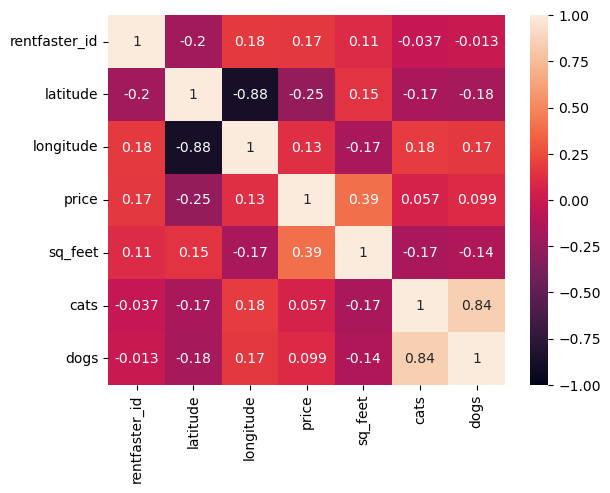

In [70]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1);

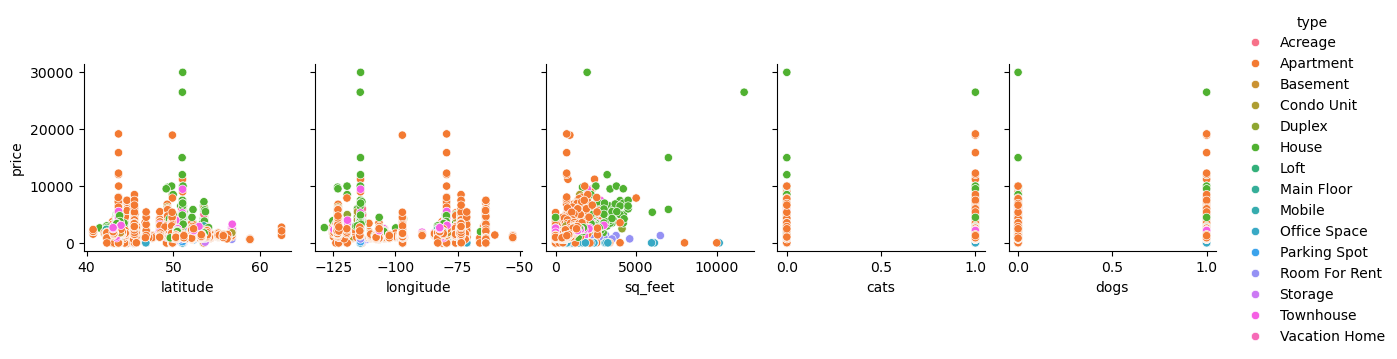

In [71]:
sns.pairplot(df, x_vars=['latitude', 'longitude', 'sq_feet', 'cats', 'dogs'], y_vars=['price'], hue='type');

Based on the correlation coefficient (0.39) and the plots, there seems to be a relationship between the square feet and the price. Also, the places where animals are not accepted seem to be more expensive.

#### 2.3.2 Distribution of the price by province

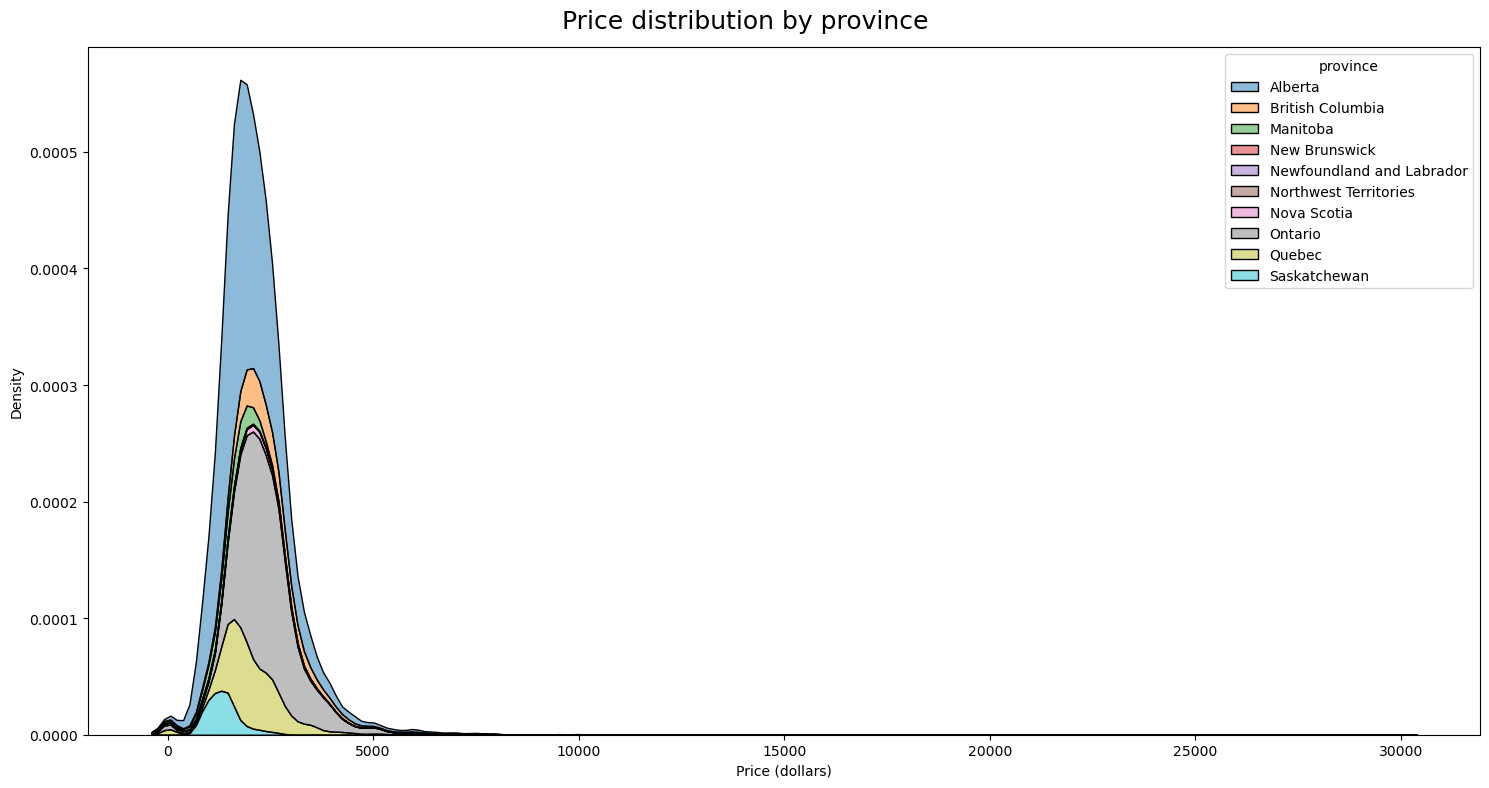

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.kdeplot(data=df, x='price', hue='province', fill=True, alpha=0.5, multiple='stack', ax=ax)
g.set(xlabel='Price (dollars)')
fig.suptitle('Price distribution by province', fontsize=18)
fig.tight_layout();

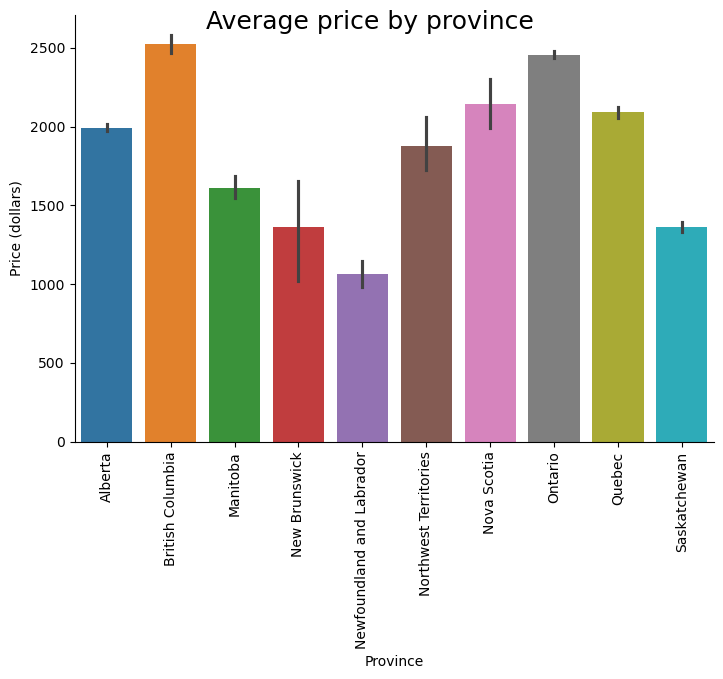

In [75]:
ax = sns.catplot(data=df, x='province', y='price', kind='bar', aspect=1.5, hue='province')
ax.tick_params(axis='x', rotation=90)
ax.fig.suptitle('Average price by province', fontsize=18)
ax.set_xlabels('Province')
ax.set_ylabels('Price (dollars)');

The highest average price is in British Columbia but the prices are generally higher in Alberta.

## 3. Feature Engineering and Data Preprocessing

### 3.1 Remove unimportant columns

In [79]:
# Remove rentfaster_id, address, link and availability_date, as there are non-numeric or non-categorical
df.drop(columns=['rentfaster_id', 'address', 'link', 'availability_date'], axis=1, inplace=True)
df.sample(3)

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,smoking,cats,dogs
4570,Calgary,Alberta,51.032720,-114.070633,Long Term,Apartment,1575.0,1 Bed,1,780.0,Unfurnished,Non-Smoking,True,True
6699,Edmonton,Alberta,53.503288,-113.511117,Negotiable,Basement,1100.0,1 Bed,1,811.3,Unfurnished,Non-Smoking,True,True
8874,Calgary,Alberta,51.039445,-114.214688,Long Term,Apartment,2200.0,1 Bed,1,592.0,Unfurnished,Non-Smoking,True,True


### 3.2 Encode non-ordinal categorical columns

We will reduce the cardinality of the columns with more than 3 unique values. If the relative frequency of a value is less than 5%, we will add it in a category named 'Other'.

#### Lease Term

In [83]:
df['lease_term'].value_counts(normalize=True)

lease_term
Long Term     0.935101
Negotiable    0.047414
Short Term    0.011657
12 months     0.003255
Unknown       0.002415
6 months      0.000105
months        0.000053
Name: proportion, dtype: float64

In [158]:
df['lease_term'] = np.where(df['lease_term'] == 'Long Term', 'Long Term', 'Other')
df['lease_term'] = df['lease_term'].astype('category')
df['lease_term'].value_counts(normalize=True)

lease_term
Long Term    0.935101
Other        0.064899
Name: proportion, dtype: float64

#### Type

In [136]:
df['type'].value_counts(normalize=True)

type
Apartment        0.699659
Condo Unit       0.068574
Townhouse        0.055185
House            0.054030
Basement         0.053400
Main Floor       0.024573
Room For Rent    0.021528
Duplex           0.016277
Office Space     0.003150
Storage          0.001103
Parking Spot     0.001103
Loft             0.000788
Acreage          0.000420
Mobile           0.000105
Vacation Home    0.000105
Name: proportion, dtype: float64

In [156]:
df['type'] = np.where(df['type'].isin(['Apartment', 'Condo Unit', 'Townhouse', 'House', 'Basement']), df['type'], 'Other')
df['type'].value_counts(normalize=True)
df['type'] = df['type'].astype('category')
df['type'].value_counts(normalize=True)

type
Apartment     0.699659
Other         0.069152
Condo Unit    0.068574
Townhouse     0.055185
House         0.054030
Basement      0.053400
Name: proportion, dtype: float64

#### Beds

In [146]:
df['beds'].value_counts(normalize=True)

beds
2 Beds       0.379995
1 Bed        0.372276
3 Beds       0.135206
Studio       0.073615
4 Beds       0.025466
5 Beds       0.007351
Unknown      0.003465
6 Beds       0.001838
7 Beds       0.000420
9 Beds       0.000158
none Beds    0.000105
8 Beds       0.000105
Name: proportion, dtype: float64

In [ ]:
#TODO: regroup beds (none or Unknown), Studio, 1, 2, 3, 4+)

In [ ]:
# Encode features using OneHotEncoder

#### City and Province

We won't use the same method as the previous categories, because I think it's important to get the pricing for each city and province. We will use Frequency Encoding Instead.

In [80]:
# Save frequency mapping of cities and provinces
city_frequency = df['city'].value_counts(normalize=True)
city_frequency

city
Calgary             0.247887
Edmonton            0.134944
Toronto             0.125755
Montréal            0.079601
Ottawa              0.056918
                      ...   
Christopher Lake    0.000053
Priddis             0.000053
Innisfail           0.000053
Langdon             0.000053
Crowsnest Pass      0.000053
Name: proportion, Length: 269, dtype: float64

In [81]:
province_frequency = df['province'].value_counts(normalize=True)
province_frequency

province
Alberta                      0.437175
Ontario                      0.312260
Quebec                       0.109898
British Columbia             0.058598
Saskatchewan                 0.035967
Manitoba                     0.030349
Nova Scotia                  0.013389
Northwest Territories        0.001050
New Brunswick                0.000683
Newfoundland and Labrador    0.000630
Name: proportion, dtype: float64

In [82]:
# Encode data using Frequency Encoding
df['city'] = df['city'].map(city_frequency)
df['province'] = df['province'].map(province_frequency)
df.sample(3)

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,smoking,cats,dogs
17254,0.079601,0.109898,45.498170,-73.557816,Long Term,Apartment,1680.0,1 Bed,1,507.0,Unfurnished,Unknown,True,True
13139,0.056918,0.312260,45.364523,-75.787876,Long Term,Apartment,1734.0,1 Bed,1,660.0,Unfurnished,Non-Smoking,True,True
5104,0.134944,0.437175,53.548087,-113.523753,Long Term,Apartment,1570.0,1 Bed,1,752.0,Unfurnished,Non-Smoking,True,True


### 3.3 Encode boolean columns

## 4. Regression

### 3.1 Find the model

### 3.2 Make predictions

## End